# Data Science Project
#### Project Team
1. Muhammad Abdul Nafay (19P-0117)
2. Muhammad Usman (19P-0116)

### About Dataset
#### Context
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment. Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.
During the entire course of the pandemic, one of the main problems that healthcare providers have faced is the shortage of medical resources and a proper plan to efficiently distribute them. In these tough times, being able to predict what kind of resource an individual might require at the time of being tested positive or even before that will be of immense help to the authorities as they would be able to procure and arrange for the resources necessary to save the life of that patient.

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

### Content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

- Sex: female or male
- Age: of the patient.
- Classification: **Values 1-3** *mean that the patient was diagnosed with covid in different degrees*. **4 or higher** *means that the patient is not a carrier of covid or that the test is inconclusive.*
- Patient type: hospitalized or not hospitalized.
- Pneumonia: whether the patient already have air sacs inflammation or not.
- Pregnancy: whether the patient is pregnant or not.
- Diabetes: whether the patient has diabetes or not.
- Copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
- Asthma: whether the patient has asthma or not.
- Inmsupr: whether the patient is immunosuppressed or not.
- Hypertension: whether the patient has hypertension or not.
- Cardiovascular: whether the patient has heart or blood vessels related disease.
- Renal chronic: whether the patient has chronic renal disease or not.
- Other disease: whether the patient has other disease or not.
- Obesity: whether the patient is obese or not.
- Tobacco: whether the patient is a tobacco user.
- Usmr: Indicates whether the patient treated medical units of the first, second or third level.
- Medical unit: type of institution of the National Health System that provided the care.
- Intubed: whether the patient was connected to the ventilator.
- Icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
- Death: indicates whether the patient died or recovered.

# Part 1

#### First our main focues is to classify whether a person has COVID or not based on the features given of the patient

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from copy import deepcopy

In [31]:
raw_data = pd.read_csv('./Covid Data.csv')
raw_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [169]:
raw_data['USMER'].value_counts()

2    662903
1    385672
Name: USMER, dtype: int64

In [170]:
raw_data['MEDICAL_UNIT'].value_counts()

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

In [171]:
raw_data['SEX'].value_counts()

1    525064
2    523511
Name: SEX, dtype: int64

In [172]:
raw_data['PATIENT_TYPE'].value_counts()

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

In [173]:
raw_data['DATE_DIED'].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [174]:
raw_data['INTUBED'].value_counts()


97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [175]:
raw_data['PNEUMONIA'].value_counts()

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

In [176]:
raw_data['AGE'].value_counts()
raw_data['AGE'].max()
raw_data['AGE'].min()


0

In [177]:
raw_data['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [178]:
raw_data['DIABETES'].value_counts()

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

In [179]:
raw_data['COPD'].value_counts()

2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

In [180]:
raw_data['ASTHMA'].value_counts()



2     1014024
1       31572
98       2979
Name: ASTHMA, dtype: int64

In [181]:
raw_data['INMSUPR'].value_counts()



2     1031001
1       14170
98       3404
Name: INMSUPR, dtype: int64

In [182]:
raw_data['HIPERTENSION'].value_counts()



2     882742
1     162729
98      3104
Name: HIPERTENSION, dtype: int64

In [183]:
raw_data['OTHER_DISEASE'].value_counts()



2     1015490
1       28040
98       5045
Name: OTHER_DISEASE, dtype: int64

In [184]:
raw_data['CARDIOVASCULAR'].value_counts()



2     1024730
1       20769
98       3076
Name: CARDIOVASCULAR, dtype: int64

In [185]:
raw_data['OBESITY'].value_counts()

2     885727
1     159816
98      3032
Name: OBESITY, dtype: int64

In [186]:
raw_data['RENAL_CHRONIC'].value_counts()

2     1026665
1       18904
98       3006
Name: RENAL_CHRONIC, dtype: int64

In [187]:
raw_data['TOBACCO'].value_counts()

2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [188]:
raw_data['CLASIFFICATION_FINAL'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

In [189]:
raw_data['ICU'].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

In [243]:
raw_data.corr(method='pearson')['CLASIFFICATION_FINAL']


USMER                   0.028840
MEDICAL_UNIT            0.079981
SEX                    -0.057782
PATIENT_TYPE           -0.183370
INTUBED                 0.193075
PNEUMONIA               0.075351
AGE                    -0.152637
PREGNANT               -0.057809
DIABETES               -0.004739
COPD                   -0.010336
ASTHMA                 -0.011178
INMSUPR                -0.009412
HIPERTENSION           -0.006020
OTHER_DISEASE          -0.011143
CARDIOVASCULAR         -0.012143
OBESITY                -0.006924
RENAL_CHRONIC          -0.011342
TOBACCO                -0.012567
CLASIFFICATION_FINAL    1.000000
ICU                     0.193163
Name: CLASIFFICATION_FINAL, dtype: float64

# Visualizing Raw Data

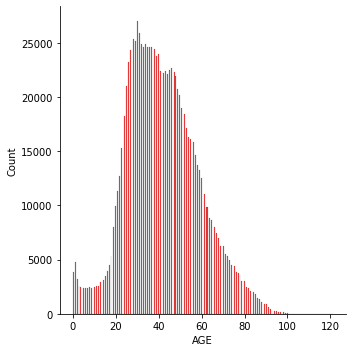

In [238]:
sns.displot(raw_data['AGE'], color='r', kde=False,)


<AxesSubplot:xlabel='CLASIFFICATION_FINAL', ylabel='AGE'>

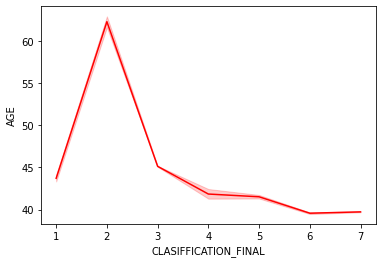

In [225]:
sns.lineplot(x='CLASIFFICATION_FINAL', y='AGE', data=raw_data, color='r')


<AxesSubplot:xlabel='CLASIFFICATION_FINAL', ylabel='SEX'>

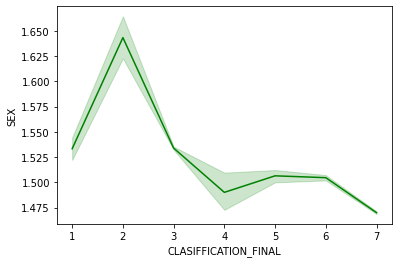

In [226]:
sns.lineplot(x='CLASIFFICATION_FINAL', y='SEX', data=raw_data, color='g')


<AxesSubplot:xlabel='CLASIFFICATION_FINAL', ylabel='AGE'>

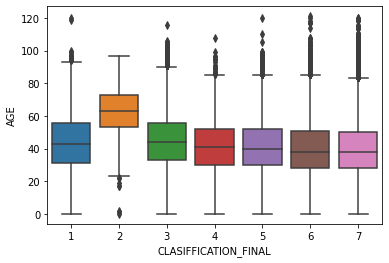

In [227]:
sns.boxplot(x='CLASIFFICATION_FINAL', y='AGE', data=raw_data)


<AxesSubplot:>

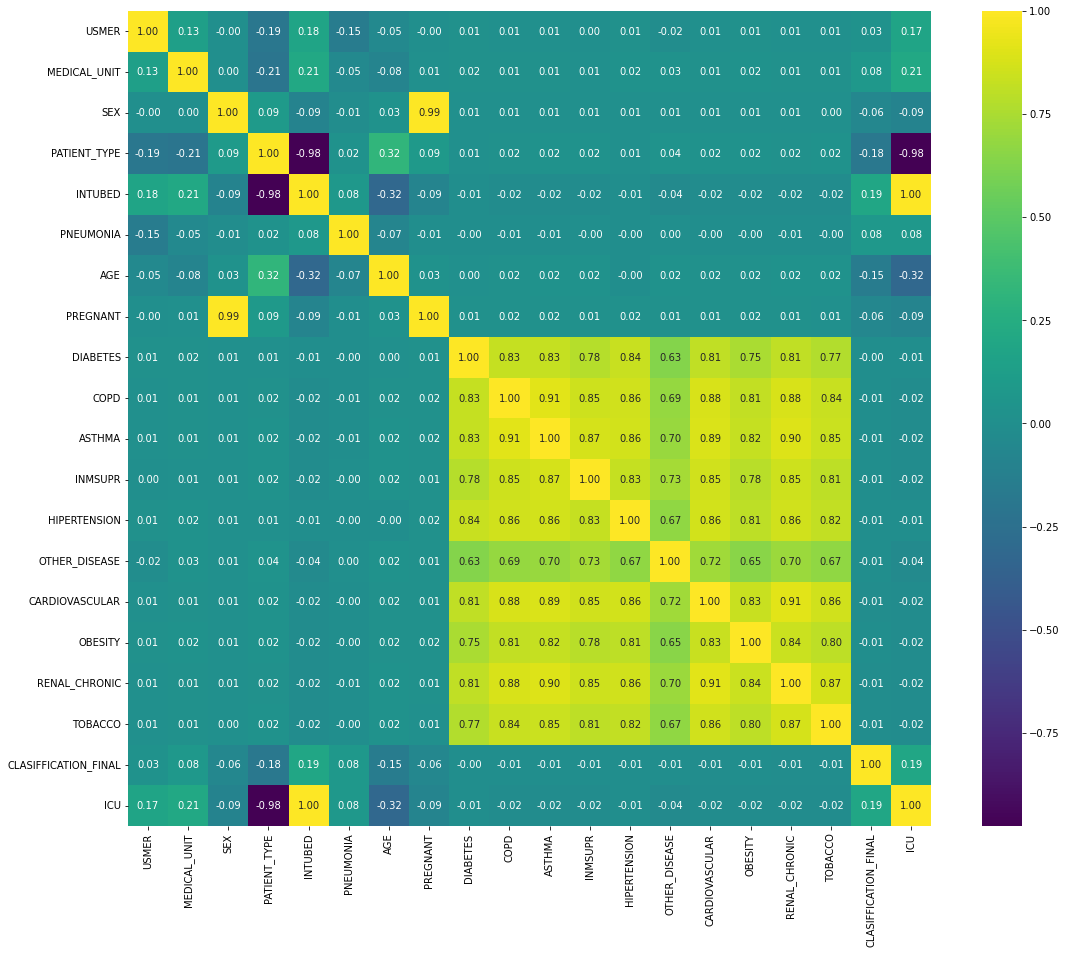

In [241]:
plt.figure(figsize=(18,15))
sns.heatmap(raw_data.corr(),annot=True,cmap='viridis',fmt=".2f")

# Data Preprocessing

### *It is common in demography to split the population into three broad age groups: children and young adolescents (under 15 years old) the working-age population (15-64 years) and. the elderly population (65 years and older)*


- #### Young Adolescents/Childrens = 1 (in D2.csv) OR C (in D1.csv)
- #### Working-Age Populations = 2 (in D2.csv) OR A (in D1.csv)
- #### Elderly Populations = 3 (in D2.csv) OR E (in D1.csv)

In [33]:
d1 = raw_data.drop(columns={'ICU', 'DATE_DIED',
                   'PREGNANT', 'MEDICAL_UNIT', 'INTUBED'})

d1['AGE_BINS'] = pd.cut(x=d1['AGE'], bins=[-1, 15, 64, 121], labels=[1, 2, 3])


In [34]:
d1.drop(columns={"AGE"}, inplace=True)
d1.rename(columns={'AGE_BINS': 'AGE', 'CLASIFFICATION_FINAL': 'CLASIFFICATION'}, inplace=True)
d1.head()

,USMER,SEX,PATIENT_TYPE,PNEUMONIA,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION,AGE
0,2,1,1,1,2,2,2,2,1,2,2,2,2,2,3,3
1,2,2,1,1,2,2,2,2,1,2,2,1,1,2,5,3
2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,2,2,2,2,2,2,2,2,2,2,2,7,2
4,2,2,1,2,1,2,2,2,1,2,2,2,2,2,3,3


In [35]:
d1 = d1[['SEX', 'AGE', 'PATIENT_TYPE', 'USMER', 'DIABETES',
    'COPD','PNEUMONIA' , 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'OTHER_DISEASE', 'CLASIFFICATION']]

In [36]:
d1['CLASIFFICATION'] = pd.cut(
    x=d1['CLASIFFICATION'], bins=[0, 3, 7], labels=['Y', 'N'])
d1.head()

,SEX,AGE,PATIENT_TYPE,USMER,DIABETES,COPD,PNEUMONIA,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,OTHER_DISEASE,CLASIFFICATION
0,1,3,1,2,2,2,1,2,2,1,2,2,2,2,2,Y
1,2,3,1,2,2,2,1,2,2,1,2,1,1,2,2,N
2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,Y
3,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,N
4,2,3,1,2,1,2,2,2,2,1,2,2,2,2,2,Y


In [37]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   SEX             1048575 non-null  int64   
 1   AGE             1048575 non-null  category
 2   PATIENT_TYPE    1048575 non-null  int64   
 3   USMER           1048575 non-null  int64   
 4   DIABETES        1048575 non-null  int64   
 5   COPD            1048575 non-null  int64   
 6   PNEUMONIA       1048575 non-null  int64   
 7   ASTHMA          1048575 non-null  int64   
 8   INMSUPR         1048575 non-null  int64   
 9   HIPERTENSION    1048575 non-null  int64   
 10  CARDIOVASCULAR  1048575 non-null  int64   
 11  OBESITY         1048575 non-null  int64   
 12  RENAL_CHRONIC   1048575 non-null  int64   
 13  TOBACCO         1048575 non-null  int64   
 14  OTHER_DISEASE   1048575 non-null  int64   
 15  CLASIFFICATION  1048575 non-null  category
dtypes: category(2), in

In [45]:
d2 = d1[(d1['DIABETES'] != 98) & (d1['COPD'] != 98) & (d1['PNEUMONIA'] != 99) &
        (d1['ASTHMA'] != 98) & (d1['INMSUPR'] != 98) & 
        (d1['HIPERTENSION'] != 98) & (d1['CARDIOVASCULAR'] != 98) & 
        (d1['OBESITY'] != 98) & (d1['RENAL_CHRONIC'] != 98) & 
        (d1['TOBACCO'] != 98) & (d1['OTHER_DISEASE'] != 98)]


In [46]:
d3 = d2.copy()

d3['AGE'] = d3['AGE'].replace(to_replace=1, value="C")
d3['AGE'] = d3['AGE'].replace(to_replace=2, value="A")
d3['AGE'] = d3['AGE'].replace(to_replace=3, value="E")

d3['SEX'] = d3['SEX'].replace(to_replace=1, value="F")
d3['SEX'] = d3['SEX'].replace(to_replace=2, value="M")

d3['DIABETES'] = d3['DIABETES'].replace(to_replace=1, value="Y")
d3['DIABETES'] = d3['DIABETES'].replace(to_replace=2, value="N")

d3['COPD'] = d3['COPD'].replace(to_replace=1, value="Y")
d3['COPD'] = d3['COPD'].replace(to_replace=2, value="N")

d3['ASTHMA'] = d3['ASTHMA'].replace(to_replace=1, value="Y")
d3['ASTHMA'] = d3['ASTHMA'].replace(to_replace=2, value="N")

d3['INMSUPR'] = d3['INMSUPR'].replace(to_replace=1, value="Y")
d3['INMSUPR'] = d3['INMSUPR'].replace(to_replace=2, value="N")

d3['HIPERTENSION' ] = d3['HIPERTENSION'].replace(to_replace=1, value="Y")
d3['HIPERTENSION' ] = d3['HIPERTENSION'].replace(to_replace=2, value="N")

d3['CARDIOVASCULAR'] = d3['CARDIOVASCULAR'].replace(to_replace=1, value="Y")
d3['CARDIOVASCULAR'] = d3['CARDIOVASCULAR'].replace(to_replace=2, value="N")

d3['OBESITY'] = d3['OBESITY'].replace(to_replace=1, value="Y")
d3['OBESITY'] = d3['OBESITY'].replace(to_replace=2, value="N")

d3['RENAL_CHRONIC'] = d3['RENAL_CHRONIC'].replace(to_replace=1, value="Y")
d3['RENAL_CHRONIC'] = d3['RENAL_CHRONIC'].replace(to_replace=2, value="N")

d3['TOBACCO'] = d3['TOBACCO'].replace(to_replace=1, value="Y")
d3['TOBACCO'] = d3['TOBACCO'].replace(to_replace=2, value="N")

d3['OTHER_DISEASE'] = d3['OTHER_DISEASE'].replace(to_replace=1, value="Y")
d3['OTHER_DISEASE'] = d3['OTHER_DISEASE'].replace(to_replace=2, value="N")

d3['PNEUMONIA'] = d3['PNEUMONIA'].replace(to_replace=1, value="Y")
d3['PNEUMONIA'] = d3['PNEUMONIA'].replace(to_replace=2, value="N")


In [47]:
# d3['DIABETES'].value_counts()
# d3['COPD'].value_counts()
# d3['ASTHMA'].value_counts()
# d3['INMSUPR'].value_counts()
# d3['HIPERTENSION'].value_counts()
# d3['CARDIOVASCULAR'].value_counts()
# d3['OBESITY'].value_counts()
# d3['RENAL_CHRONIC'].value_counts()
# d3['TOBACCO'].value_counts()
# d3['OTHER_DISEASE'].value_counts()
# d3['PNEUMONIA'].value_counts()
# d3['PATIENT_TYPE'].value_counts()
# d3['USMER'].value_counts()
# d3['INTUBED'].value_counts()


In [198]:
d3.to_csv('d1.csv', index=False)

In [199]:
d2.to_csv('d2.csv', index=False)

In [49]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   SEX             1025152 non-null  object  
 1   AGE             1025152 non-null  category
 2   PATIENT_TYPE    1025152 non-null  int64   
 3   USMER           1025152 non-null  int64   
 4   DIABETES        1025152 non-null  object  
 5   COPD            1025152 non-null  object  
 6   PNEUMONIA       1025152 non-null  object  
 7   ASTHMA          1025152 non-null  object  
 8   INMSUPR         1025152 non-null  object  
 9   HIPERTENSION    1025152 non-null  object  
 10  CARDIOVASCULAR  1025152 non-null  object  
 11  OBESITY         1025152 non-null  object  
 12  RENAL_CHRONIC   1025152 non-null  object  
 13  TOBACCO         1025152 non-null  object  
 14  OTHER_DISEASE   1025152 non-null  object  
 15  CLASIFFICATION  1025152 non-null  category
dtypes: category(2), in

In [48]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025152 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype   
---  ------          --------------    -----   
 0   SEX             1025152 non-null  int64   
 1   AGE             1025152 non-null  category
 2   PATIENT_TYPE    1025152 non-null  int64   
 3   USMER           1025152 non-null  int64   
 4   DIABETES        1025152 non-null  int64   
 5   COPD            1025152 non-null  int64   
 6   PNEUMONIA       1025152 non-null  int64   
 7   ASTHMA          1025152 non-null  int64   
 8   INMSUPR         1025152 non-null  int64   
 9   HIPERTENSION    1025152 non-null  int64   
 10  CARDIOVASCULAR  1025152 non-null  int64   
 11  OBESITY         1025152 non-null  int64   
 12  RENAL_CHRONIC   1025152 non-null  int64   
 13  TOBACCO         1025152 non-null  int64   
 14  OTHER_DISEASE   1025152 non-null  int64   
 15  CLASIFFICATION  1025152 non-null  category
dtypes: category(2), in

In [201]:
d2.head()

,SEX,AGE,PATIENT_TYPE,USMER,DIABETES,COPD,PNEUMONIA,ASTHMA,INMSUPR,HIPERTENSION,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,OTHER_DISEASE,CLASIFFICATION
0,1,3,1,2,2,2,1,2,2,1,2,2,2,2,2,Y
1,2,3,1,2,2,2,1,2,2,1,2,1,1,2,2,N
2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,Y
3,1,2,1,2,2,2,2,2,2,2,2,2,2,2,2,N
4,2,3,1,2,1,2,2,2,2,1,2,2,2,2,2,Y


# Visualizing Clean Data

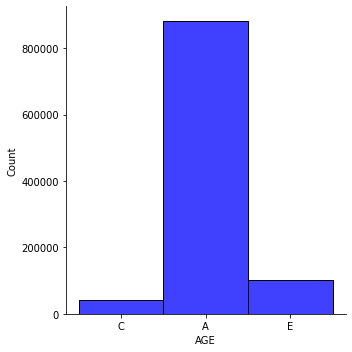

In [230]:
sns.displot(d3['AGE'], color='b', kde=False)


<AxesSubplot:xlabel='AGE', ylabel='SEX'>

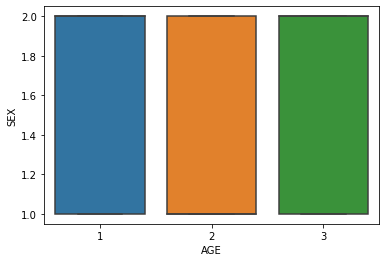

In [232]:
sns.boxplot(x='AGE', y='SEX', data=d2)


<AxesSubplot:xlabel='CLASIFFICATION', ylabel='OTHER_DISEASE'>

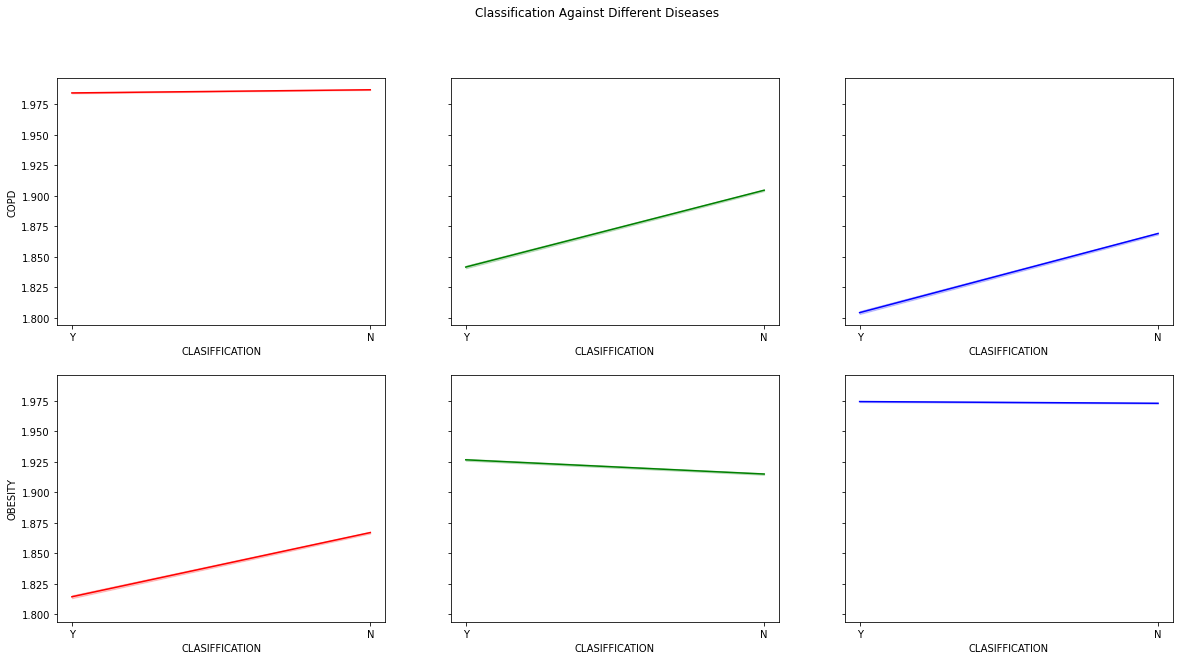

In [234]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
fig.suptitle('Classification Against Different Diseases')

# Bulbasaur
sns.lineplot(ax=axes[0, 0], x='CLASIFFICATION',
             y='COPD', data=d2, color='r')

# Charmander
sns.lineplot(ax=axes[0, 1], x='CLASIFFICATION',
             y='DIABETES', data=d2, color='g')

# Squirtle
sns.lineplot(ax=axes[0, 2], x='CLASIFFICATION',
             y='HIPERTENSION', data=d2, color='b')

sns.lineplot(ax=axes[1, 0], x='CLASIFFICATION',
             y='OBESITY', data=d2, color='r')

sns.lineplot(ax=axes[1, 1], x='CLASIFFICATION',
             y='TOBACCO', data=d2, color='g')

sns.lineplot(ax=axes[1, 2], x='CLASIFFICATION',
             y='OTHER_DISEASE', data=d2, color='b')


# Applying Machine Learning 

### Naive-Bayes

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


In [203]:
X = d2.iloc[:, 0:15]
y = d2.iloc[:, 15]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)


In [204]:
gnb = GaussianNB()
ypred = gnb.fit(X_train, y_train).predict(X_test)


In [205]:
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report: " ,)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy: ",result2)

Confusion Matrix: 
[[152733  37966]
 [ 72954  43893]]
Classification Report: 
              precision    recall  f1-score   support

           N       0.68      0.80      0.73    190699
           Y       0.54      0.38      0.44    116847

    accuracy                           0.64    307546
   macro avg       0.61      0.59      0.59    307546
weighted avg       0.62      0.64      0.62    307546

Accuracy:  0.6393385054593459


## **Accuracy: 64%**

### Logistic Regression

In [206]:
X = d2.iloc[:, 0:15]
y = d2.iloc[:, 15]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.3)


In [207]:
X = d2.iloc[:, 0:15]
y = d2.iloc[:, 15]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.3)


In [208]:
model1 = LogisticRegression(random_state=0,
                            penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)


In [209]:
result = confusion_matrix(y_test, preds)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test, preds)
print("Classification Report: " ,)
print (result1)
result2 = accuracy_score(y_test,preds)
print("Accuracy: ",result2)


Confusion Matrix: 
[[174526  16173]
 [ 89359  27488]]
Classification Report: 
              precision    recall  f1-score   support

           N       0.66      0.92      0.77    190699
           Y       0.63      0.24      0.34    116847

    accuracy                           0.66    307546
   macro avg       0.65      0.58      0.56    307546
weighted avg       0.65      0.66      0.61    307546

Accuracy:  0.6568578359009709


## **Accuracy: 65%**

### K-Means Clustering Using PCA

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [211]:
X = d2.iloc[:, 0:15]
y = d2.iloc[:, 15]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.3)


In [212]:
clustering_kmeans = KMeans(n_clusters=2)
X['clusters'] = clustering_kmeans.fit_predict(X)


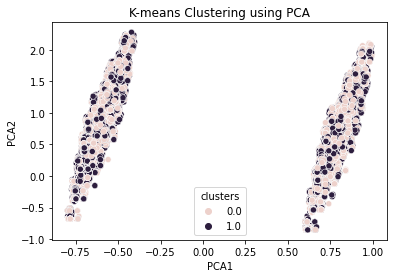

In [213]:
pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])

sns.scatterplot(x="PCA1", y="PCA2", hue=X['clusters'], data=results)
plt.title('K-means Clustering using PCA')
plt.show()


### Decision Trees Classification

In [214]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [215]:
X = d2.iloc[:, 0:15]
y = d2.iloc[:, 15]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0, test_size=0.3)


In [216]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [217]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report: " ,)
print (result1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Confusion Matrix: 
[[172633  18066]
 [ 86766  30081]]
Classification Report: 
              precision    recall  f1-score   support

           N       0.67      0.91      0.77    190699
           Y       0.62      0.26      0.36    116847

    accuracy                           0.66    307546
   macro avg       0.65      0.58      0.57    307546
weighted avg       0.65      0.66      0.61    307546

Accuracy: 0.6591339181780936


## **Accuracy: 64%**

### Random Forest Classification

In [218]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier


In [219]:
X = d2.iloc[:, 0:15]
y = d2.iloc[:, 15]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3)


##### Takes Time to Execute!

In [220]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [221]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report: " ,)
print (result1)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Confusion Matrix: 
[[172394  18416]
 [ 86064  30672]]
Classification Report: 
              precision    recall  f1-score   support

           N       0.67      0.90      0.77    190810
           Y       0.62      0.26      0.37    116736

    accuracy                           0.66    307546
   macro avg       0.65      0.58      0.57    307546
weighted avg       0.65      0.66      0.62    307546

Accuracy: 0.6602784624088754


## **Accuracy: 66%**

# Part 2

Now we turn our attention to classfying "DEATH" which comes from "DATE-DIED" attribute, for example, If we have a date that is "9999-99-99", then that means this patient is alive.

In [5]:
df = pd.read_csv('./Covid Data.csv')
df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
for i in df.columns:
    print(i, "=>\t", len(df[i].unique()))


USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
DATE_DIED =>	 401
INTUBED =>	 4
PNEUMONIA =>	 3
AGE =>	 121
PREGNANT =>	 4
DIABETES =>	 3
COPD =>	 3
ASTHMA =>	 3
INMSUPR =>	 3
HIPERTENSION =>	 3
OTHER_DISEASE =>	 3
CARDIOVASCULAR =>	 3
OBESITY =>	 3
RENAL_CHRONIC =>	 3
TOBACCO =>	 3
CLASIFFICATION_FINAL =>	 7
ICU =>	 4


INFERENCE:
1) We have some features that we expect them to have just 2 unique values but we see that these features have 3 or 4 unique values. For example the feature "PNEUMONIA" has 3 unique values (1,2,99) 99 represents NaN values. Hence we will just take the rows that includes 1 and 2 values. 
2) In "DATE_DIED" column, we have 971633 "9999-99-99" values which represent alive patients so i will take this feature as a "DEATH" that includes wether the patient died or not.

In [7]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]


 If we have "9999-99-99" values that means this patient is alive.


In [8]:
df["DEATH"] = [2 if each=="9999-99-99" else 1 for each in df.DATE_DIED]

We see that all "97" values are for males and males can not be pregnant so we will convert 97 to 2.

In [9]:
# Converting process according to inference above
df.PREGNANT = df.PREGNANT.replace(97, 2)

# Getting rid of the missing values
df = df[(df.PREGNANT == 1) | (df.PREGNANT == 2)]


### Dropping the columns
In "INTUBED" and "ICU" features there are too many missing values so i will drop them. Also we don't need "DATE_DIED" column anymore because we used this feature as a "DEATH" feature.

In [10]:
df.drop(columns=["INTUBED","ICU","DATE_DIED"], inplace=True)

In [11]:
df.head()


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1


In [12]:
for i in df.columns:
    print(i,"=>\t",len(df[i].unique()))

USMER =>	 2
MEDICAL_UNIT =>	 13
SEX =>	 2
PATIENT_TYPE =>	 2
PNEUMONIA =>	 2
AGE =>	 121
PREGNANT =>	 2
DIABETES =>	 2
COPD =>	 2
ASTHMA =>	 2
INMSUPR =>	 2
HIPERTENSION =>	 2
OTHER_DISEASE =>	 2
CARDIOVASCULAR =>	 2
OBESITY =>	 2
RENAL_CHRONIC =>	 2
TOBACCO =>	 2
CLASIFFICATION_FINAL =>	 7
DEATH =>	 2


As we see, we have just one numeric feature which is called "AGE" the rest of them are categorical.

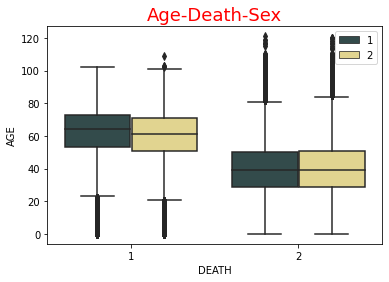

In [13]:
sns.boxplot(x="DEATH", y="AGE", hue="SEX", data=df, palette=sns.color_palette(["#2f4f4f", "#eedd82"]))
plt.title("Age-Death-Sex", fontsize=18, color="red")
plt.legend(loc="best")


### Feature Selection
I will drop the features that have low correlation with "DEATH" feature.

In [14]:
unrelevant_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]

df.drop(columns=unrelevant_columns,inplace=True)

In [15]:
df.head()


,USMER,MEDICAL_UNIT,PATIENT_TYPE,PNEUMONIA,AGE,DIABETES,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,65,2,1,2,3,1
1,2,1,1,1,72,2,1,1,5,1
2,2,1,2,2,55,1,2,2,3,1
3,2,1,1,2,53,2,2,2,7,1
4,2,1,1,2,68,1,1,2,3,1


In [16]:
df = pd.get_dummies(df,columns=["MEDICAL_UNIT","CLASIFFICATION_FINAL"],drop_first=True)

In [17]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [18]:
scaler = RobustScaler()
df.AGE = scaler.fit_transform(df.AGE.values.reshape(-1, 1))
x = df.drop(columns="DEATH")
y = df["DEATH"]


In [19]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

In [20]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))
print("Logistic Regression F1 Score :", f1_score(test_y, logreg.predict(test_x), average=None))


c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy : 0.9394215150981429
Logistic Regression F1 Score : [0.52015191 0.96767001]


## Accuracy: 93%

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

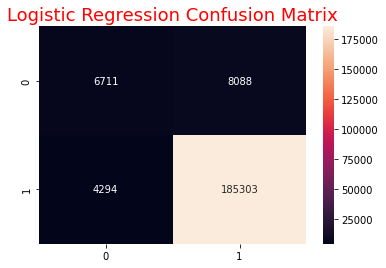

In [21]:
sns.heatmap(confusion_matrix(test_y, logreg.predict(test_x)), annot=True, fmt=".0f")
plt.title("Logistic Regression Confusion Matrix",fontsize=18, color="red")

### Naive Bayes

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics


In [28]:
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

In [29]:
gnb = GaussianNB()
ypred = gnb.fit(train_x, train_y).predict(test_x)


In [30]:
result = confusion_matrix(test_y, ypred)
print("Confusion Matrix: ")
print(result)
result1 = classification_report(test_y, ypred)
print("Classification Report: " ,)
print (result1)
print("Accuracy:",metrics.accuracy_score(test_y, ypred))

Confusion Matrix: 
[[  5858   8941]
 [  8445 181152]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.41      0.40      0.40     14799
           2       0.95      0.96      0.95    189597

    accuracy                           0.91    204396
   macro avg       0.68      0.68      0.68    204396
weighted avg       0.91      0.91      0.91    204396

Accuracy: 0.9149396269985715


### Accuracy: 91%